# Step 1: Data CSV Generation (optional):
## Generate Random Data for Linear equation (y = (x1 + x2 )*x3 )
#### Note: pick any linear equation of 

In [1]:
import numpy as np
import pandas as pd
from random import randint

In [2]:

# Generate 10000 records on equation (x1+x2)*x3 = y
TOTAL_RECORDS = 10000
MAX_RANDOM_RANGE = 100

RANDOM_DICT = {
    'low': 0,
    'high': MAX_RANDOM_RANGE,
    'size': TOTAL_RECORDS
}
# Generate a random pandas dataframe with two columns X1, X2, X3
df = pd.DataFrame({'X1': np.random.randint(**RANDOM_DICT),
                   'X2': np.random.randint(**RANDOM_DICT),
                   'X3': np.random.randint(**RANDOM_DICT)
                  })
df['y'] = (df['X1'] + df['X2']) * df['X3']


In [3]:
df.head()

,X1,X2,X3,y
0,50,17,34,2278
1,9,84,96,8928
2,4,76,24,1920
3,30,72,55,5610
4,38,86,78,9672


In [4]:
CSV_FILE_NAME = "y_x1_x2_x3_equation_linear_data.csv"
df.to_csv(CSV_FILE_NAME, index=False) 

# Step 2: import CSV and Basic EDA

In [5]:
df = pd.read_csv(CSV_FILE_NAME)
df.tail()

,X1,X2,X3,y
9995,11,20,31,961
9996,87,46,33,4389
9997,20,55,0,0
9998,95,5,17,1700
9999,7,97,88,9152


In [6]:
print(df.shape)
df.describe()

(10000, 4)


,X1,X2,X3,y
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,49.882500,49.53800,49.853200,4939.118200
std,28.731986,28.60394,28.613398,3660.314079
min,0.000000,0.00000,0.000000,0.000000
25%,25.000000,25.00000,25.000000,1944.000000
50%,50.000000,49.00000,50.000000,4230.000000
75%,75.000000,74.00000,75.000000,7252.500000
max,99.000000,99.00000,99.000000,18715.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      10000 non-null  int64
 1   X2      10000 non-null  int64
 2   X3      10000 non-null  int64
 3   y       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


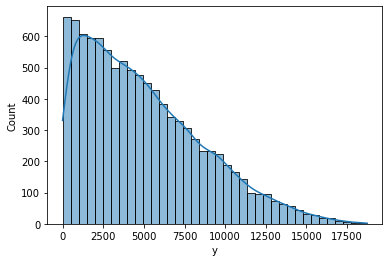

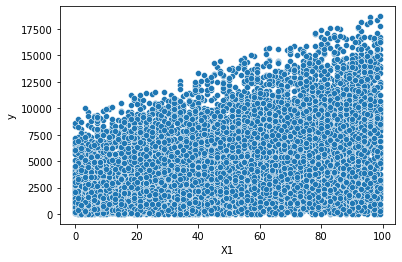

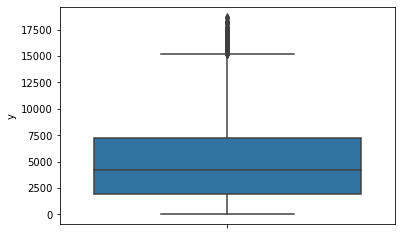

In [8]:
# visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# plot a histogram
sns.histplot(data=df, x='y', kde=True)
plt.show()

# plot a scatter plot
sns.scatterplot(data=df, x='X1', y='y')
plt.show()

# plot a box plot
sns.boxplot(data=df, y='y')
plt.show()


# Step 3: Basic Linear Regression Model building


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# split into train and test sets
X = df[['X1', 'X2', 'X3']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
X_train.shape

(8000, 3)

In [11]:
y_train.shape

(8000,)

In [12]:
# fit the linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)

# predict on the test set
y_pred = model.predict(X_test)

# Step:4 Model Evaluation

In [13]:
# calculate evaluation metrics
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred)
R2_percentage = R2 * 100

print("R-squared:", R2)
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R-squared (Acccuracy in %):", R2_percentage)

R-squared: 0.895409736530269
MSE: 1389058.6266662935
RMSE: 1178.5833134175512
MAE: 833.8219016988688
R-squared (Acccuracy in %): 89.5409736530269


# Step 4: Export Model to be used in Flask

In [14]:
import pickle
# Save the model to a pickle file
with open('y_x1_x2_x3_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Step 5: Predict Y for new values sample for one record

In [15]:
import pickle

# Load the trained model from the pickle file
with open('y_x1_x2_x3_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [16]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [17]:
output_array = []
for _ in range(100):
    x1 = randint(0, 100)
    x2 = randint(0, 100)
    x3 = randint(0, 100)    
    # Should be value for y
    y_actual = (x1+x2)*x3
    output_array.append([x1, x2, x3, y_actual])

df_output = pd.DataFrame(output_array, columns=['x1', 'x2', 'x3', 'y_actual'])

new_data_point = df_output.iloc[:, 0:3]
# Make a prediction using the trained model
y_pred = model.predict(new_data_point)
  
df_output['y_predicted'] = y_pred

df_output

,x1,x2,x3,y_actual,y_predicted
0,44,21,1,65,-1655.756460
1,23,76,86,8514,8516.540331
2,61,1,75,4650,5578.497834
3,66,6,96,6912,8174.803638
4,8,12,73,1460,3260.428305
...,...,...,...,...,...
95,60,27,82,7134,7527.910773
96,36,26,42,2604,2280.226726
97,97,50,71,10437,9446.020765
98,22,55,96,7392,8411.991268


In [18]:
with open('y_x1_x2_x3_model.pkl', 'rb') as file:
    model = pickle.load(file)
model.__dict__
# print(f"scikit-learn version: {sklearn_version}")

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['X1', 'X2', 'X3'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([50.36525553, 50.0665076 , 99.72128517]),
 'rank_': 3,
 'singular_': array([2580.53545952, 2565.70110889, 2538.08862843]),
 'intercept_': -5022.945648017606}